<a href="https://colab.research.google.com/github/aaptecode/DS-Unit-4-Sprint-2-NLP/blob/master/DS42SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd

style.use('seaborn-whitegrid')

# Part 1 - Working with Text Data

### Use Python string methods remove irregular whitespace from the following string:

In [2]:
whitespace_string = "\n\n  This is a    string   that has  \n a lot of  extra \n   whitespace.   "

print(whitespace_string)



  This is a    string   that has  
 a lot of  extra 
   whitespace.   


**New string with no extraneous whitespace.**

In [3]:
import re

regex = r'\w+|\.'

search_result = re.findall(regex, whitespace_string)
  
sentence=search_result[0]
for word in search_result[1:]:
    if word == '.':
        sentence += word
    else:
        sentence += ' ' + word
    
    
#  sentence = ' '.join(search_result)
print(sentence)

This is a string that has a lot of extra whitespace.


### Use Regular Expressions to take the dates in the following .txt file and put them into a dataframe with columns for:

[RegEx dates.txt](https://github.com/ryanleeallred/datasets/blob/master/dates.txt)

- Day
- Month
- Year


In [0]:
# from google.colab import files

# uploaded = files.upload()

In [5]:
f = open('dates.txt','r')
lines = f.read()

lines

'March 8, 2015\nMarch 15, 2015\nMarch 22, 2015\nMarch 29, 2015\nApril 5, 2015\nApril 12, 2015\nApril 19, 2015\nApril 26, 2015\nMay 3, 2015\nMay 10, 2015\nMay 17, 2015\nMay 24, 2015\nMay 31, 2015\nJune 7, 2015\nJune 14, 2015\nJune 21, 2015\nJune 28, 2015\nJuly 5, 2015\nJuly 12, 2015\nJuly 19, 2015'

In [6]:
regex = r'\w+'

search_result = re.findall(regex, lines)

len(search_result)

60

In [7]:
month = []
day = []
year = []

for i in range(0,len(search_result),3):
    month.append(str(search_result[i]))
    day.append(int(search_result[i+1]))
    year.append(int(search_result[i+2]))
    
len(month), len(day), len(year)
    
    
    

(20, 20, 20)

In [8]:
dates_df = pd.DataFrame({'Month': month, 'Day': day, 'Year':year})

# dates_df = dates_df[['Month', 'Day', 'Year']]

dates_df

,Day,Month,Year
0,8,March,2015
1,15,March,2015
2,22,March,2015
3,29,March,2015
4,5,April,2015
5,12,April,2015
6,19,April,2015
7,26,April,2015
8,3,May,2015
9,10,May,2015


# Part 2 - Bag of Words 

### Use the twitter sentiment analysis dataset found at this link for the remainder of the Sprint Challenge:

[Twitter Sentiment Analysis Dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/twitter_sentiment_binary.csv)

 ### Clean and tokenize the documents ensuring the following properties of the text:

1) Text should be lowercase.

2) Stopwords should be removed.

3) Punctuation should be removed.

4) Tweets should be tokenized at the word level. 

(The above don't necessarily need to be completed in that specific order.)

### Output some cleaned tweets so that we can see that you made all of the above changes.


In [9]:
twitter_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/twitter_sentiment_binary.csv'

df = pd.read_csv(twitter_url)

df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [10]:
import nltk
nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

**Cleaning and Tokenizing as instructed**

In [11]:
from nltk.corpus import stopwords
import string

# turn a doc into clean tokens
def clean_doc(doc):
    
	# split into tokens by white space
	tokens = doc.split()
    
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
    
	# remove remaining tokens that are not alphabetic and lowercase
	tokens = [word.lower() for word in tokens if word.isalpha()]
    
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
    
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]

    
	return tokens

df['SentimentTextCleaned'] = df.SentimentText.apply(clean_doc)

print(df.shape)
df.head()

(99989, 3)


,Sentiment,SentimentText,SentimentTextCleaned
0,0,is so sad for my APL frie...,"[sad, apl, friend]"
1,0,I missed the New Moon trail...,"[missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,"[omg, already]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[omgaga, im, sooo, im, gunna, cry, ive, dentis..."
4,0,i think mi bf is cheating on me!!! ...,"[think, mi, bf, cheating, tt]"


In [12]:
df['SentimentTextCleaned'].head(10)

0                                   [sad, apl, friend]
1                         [missed, new, moon, trailer]
2                                       [omg, already]
3    [omgaga, im, sooo, im, gunna, cry, ive, dentis...
4                        [think, mi, bf, cheating, tt]
5                                        [worry, much]
6                  [juuuuuuuuuuuuuuuuussssst, chillin]
7                 [sunny, work, tomorrow, tv, tonight]
8              [handed, uniform, today, miss, already]
9                              [hmmmm, wonder, number]
Name: SentimentTextCleaned, dtype: object

### How should TF-IDF scores be interpreted? How are they calculated?

#### Term Frequency-Inverse Document Frequency, or TF-IDF,  works differently than CountVectorizer in that it places weights on words based on their importance in the document. Words that are relatively unimportant have a lower weight while words that are more imformative receive higher weights. The procedure for calculating the weights is as follows: 1) Term Frequency (TF) is calculated the same way as in CountVectorizer (counts the number of times the feature appears in the document), 2) IDF is calculated as (number of documents with the word)**(-1), 3) These two terms are multiplied and the result is log(base 2) transformed to produce a weight in between 0 and 1. This results in much more meaningful classification later. #####

# Part 3 - Document Classification

1) Use Train_Test_Split to create train and test datasets.

2) Vectorize the tokenized documents using your choice of vectorization method. 

 - Stretch goal: Use both of the methods that we talked about in class.

3) Create a vocabulary using the X_train dataset and transform both your X_train and X_test data using that vocabulary.

4) Use your choice of binary classification algorithm to train and evaluate your model's accuracy. Report both train and test accuracies.

 - Stretch goal: Use an error metric other than accuracy and implement/evaluate multiple classifiers.



In [13]:
X = df['SentimentTextCleaned'].astype(str)
y = df['Sentiment']

X.shape, y.shape

((99989,), (99989,))

**Majority class baseline**

In [14]:
y.value_counts(normalize=True)

1    0.564632
0    0.435368
Name: Sentiment, dtype: float64

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


# Vectorizers
cv = CountVectorizer(max_features=None, ngram_range=(1,1), stop_words='english')
tfidf = TfidfVectorizer(max_features=None, ngram_range=(1,1), stop_words='english')

# Classifiers
LR = LogisticRegression(max_iter=1000, solver='lbfgs',random_state=237, n_jobs=-1)
MNB = MultinomialNB()
RF = RandomForestClassifier(n_estimators=100, random_state=237, n_jobs=-1)


results = {}

In [0]:
def vectorizer_report(vectorizer, model, X, y):
    '''Produces accuracy results for a given vectorizer'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=237)
    
    vectorizer.fit(X_train)
    train_word_counts = vectorizer.transform(X_train)
    test_word_counts = vectorizer.transform(X_test)
    
    model.fit(train_word_counts, y_train)
    train_predictions = model.predict(train_word_counts)
    test_predictions = model.predict(test_word_counts)
    
    print('REPORT\n')
    print(f'Train Accuracy:  {round(accuracy_score(y_train, train_predictions),6)}')
    print(f' Test Accuracy:  {round(accuracy_score(y_test, test_predictions),6)}')
    print()
    confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Predicted'])
    precision = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
    recall = confusion_matrix[1][1] / (confusion_matrix[1][1] +  confusion_matrix[0][1])
    f1_score = 2*(precision * recall)/(precision + recall)
    print(f'Precision:  {round(precision, 6)}')
    print(f'   Recall:  {round(recall, 6)}')
    print(f' F1-score:  {round(f1_score, 6)}')
    print()
    print(confusion_matrix)
    
    return accuracy_score(y_test, test_predictions)

## Count Vectorizer

#### Logistic Regression

In [17]:
%%time

results['cv_LR'] = vectorizer_report(cv,LR, X, y)

REPORT

Train Accuracy:  0.893938
 Test Accuracy:  0.741374

Precision:  0.750408
   Recall:  0.812688
 F1-score:  0.780308

Predicted     0     1
Actual               
0          5641  3055
1          2117  9185
CPU times: user 2.7 s, sys: 79.8 ms, total: 2.78 s
Wall time: 10.5 s


**Multinomial Naive Bayes**

In [18]:
%%time

results['cv_MNB'] = vectorizer_report(cv,MNB, X, y)

REPORT

Train Accuracy:  0.883874
 Test Accuracy:  0.741474

Precision:  0.758037
   Recall:  0.796939
 F1-score:  0.777001

Predicted     0     1
Actual               
0          5821  2875
1          2295  9007
CPU times: user 2.53 s, sys: 33.8 ms, total: 2.56 s
Wall time: 2.56 s


#### Random Forest (takes a long time)

In [19]:
%%time

results['cv_RF'] = vectorizer_report(cv,RF, X, y)

REPORT

Train Accuracy:  0.997
 Test Accuracy:  0.718072

Precision:  0.762077
   Recall:  0.728632
 F1-score:  0.744979

Predicted     0     1
Actual               
0          6125  2571
1          3067  8235
CPU times: user 20min 22s, sys: 1.14 s, total: 20min 24s
Wall time: 10min 17s


## TF-IDF

#### Logistic Regression

In [20]:
%%time

results['tfidf_LR'] = vectorizer_report(tfidf,LR, X, y)

REPORT

Train Accuracy:  0.837857
 Test Accuracy:  0.748275

Precision:  0.754094
   Recall:  0.822952
 F1-score:  0.78702

Predicted     0     1
Actual               
0          5663  3033
1          2001  9301
CPU times: user 2.6 s, sys: 81.9 ms, total: 2.69 s
Wall time: 8.27 s


#### Multinomial Naive Bayes

In [21]:
%%time

results['tfidf_MNB'] = vectorizer_report(tfidf,MNB, X, y)

REPORT

Train Accuracy:  0.876136
 Test Accuracy:  0.727823

Precision:  0.714129
   Recall:  0.864449
 F1-score:  0.782132

Predicted     0     1
Actual               
0          4785  3911
1          1532  9770
CPU times: user 2.65 s, sys: 24 ms, total: 2.67 s
Wall time: 2.68 s


#### Random Forest (takes a long time)

In [22]:
%%time

results['tfidf_RF'] = vectorizer_report(tfidf,RF, X, y)

REPORT

Train Accuracy:  0.996962
 Test Accuracy:  0.725223

Precision:  0.751799
   Recall:  0.767032
 F1-score:  0.75934

Predicted     0     1
Actual               
0          5834  2862
1          2633  8669
CPU times: user 17min 36s, sys: 740 ms, total: 17min 37s
Wall time: 8min 52s


## Accuracy Results Graph

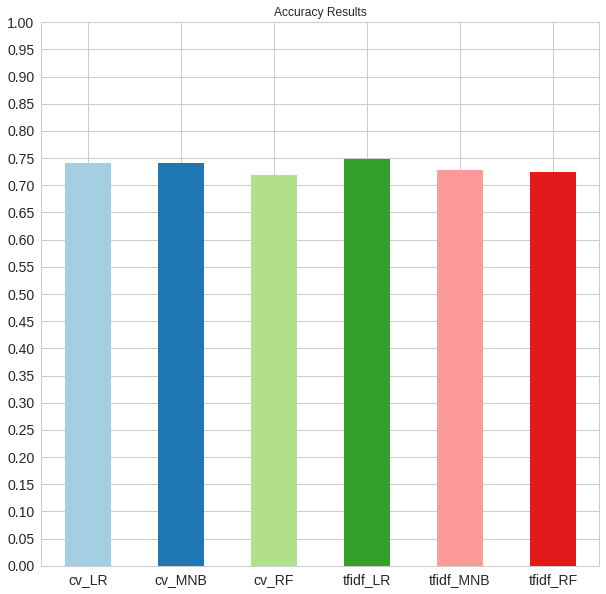

In [23]:
pd.DataFrame.from_records([results]).T.plot.bar(color=[plt.cm.Paired(np.arange(len(df)))],
                                                 alpha = 1, 
                                                 title = 'Accuracy Results',
                                                 legend = False,
                                                 yticks=[i*1.0/20 for i in range(0,21)],
                                                 fontsize = 14, 
                                                 rot = 0,
                                                 position = 0.5,
                                                 figsize=(10,10));

# Part 4 -  Word2Vec

1) Fit a Word2Vec model on your cleaned/tokenized twitter dataset. 

2) Display the 10 words that are most similar to the word "twitter"

In [24]:
!pip install -U gensim
import gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.7.1)


In [0]:
from gensim.models import Word2Vec
w2v = Word2Vec(df.SentimentTextCleaned, min_count=20, window=3, size=300)

In [26]:
w2v.wv.most_similar('twitter', topn=10)

[('account', 0.8080095052719116),
 ('list', 0.803581714630127),
 ('facebook', 0.8022700548171997),
 ('world', 0.786950945854187),
 ('page', 0.7840076684951782),
 ('link', 0.772323489189148),
 ('updates', 0.7722431421279907),
 ('app', 0.7675399780273438),
 ('sent', 0.766791582107544),
 ('via', 0.7630254626274109)]

In [27]:
# Error because all the text is lowercase

w2v.wv.most_similar('Twitter', topn=10)

KeyError: ignored

In [28]:
companies = ['facebook', 'google', 'microsoft', 'amazon']

for word in companies:
    print(word, w2v.wv.similarity("twitter", word))

facebook 0.8022701
google 0.6667052
microsoft 0.477941
amazon 0.5504715
